### RNN
    Recurrent Neural Network
    for sequencial data (depends on previous things)
    good for short term memory, but tends to forget longer sequences
    diminishing gradient problem
    to solve this problem
`LSTM`: Long Short-Term Memory, a special type of RNN

### LSTM
    frequently used RNN for sequence tasks
    4 interacting units: Forget gate, Input gate, Update gate, Output gate

`Components`
    
    Cell State: remenber a long sequence
    
    Forget Gate: tells the cell state which info to forget
$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$ for the forget gate

    Input Gate: Adds new info. 2 parts: Input layer and tanh layer
$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $
$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C$

    Update Gate: Actually perform the oprations told by the previous 2
$C_t = f_t  C_{t-1} + i_t  \tilde{C}_t$

    Output Gate: 
$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$


$h_t = o_t * \tanh(C_t) $



### Downloading the dataset

In [1]:
# !pip install yfinance

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

2024-12-23 13:55:28.119717: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-23 13:55:28.269401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734942328.330810     820 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734942328.348060     820 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-23 13:55:28.490386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import yfinance as yf

# Define the stock symbol
stock_symbol = "META"

# Create a Ticker object for the stock
ticker = yf.Ticker(stock_symbol)

# Fetch the historical market data
# Adjusted Close prices are included by default
historical_data = ticker.history(start="2013-01-01", end="2024-10-31")  # 'max' fetches all available data
# Save the data to a CSV file
historical_data.to_csv("./datasets/FB_Historical_Data.csv")
print("Data downloaded and saved as 'FB_Historical_Data.csv'")
# Test Data
historical_data = ticker.history(start="2024-11-01", end="2024-11-30")  # 'max' fetches all available data
# Save the data to a CSV file
historical_data.to_csv("./datasets/FB_Test_Data.csv")
print("Data downloaded and saved as 'FB_test_Data.csv'")




Data downloaded and saved as 'FB_Historical_Data.csv'
Data downloaded and saved as 'FB_test_Data.csv'


In [3]:
import pandas as pd
import numpy as np


In [4]:
fb_complete_data = pd.read_csv("./datasets/FB_Historical_Data.csv")
fb_complete_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02 00:00:00-05:00,27.335579,28.072763,27.315655,27.893448,69846400,0.0,0.0
1,2013-01-03 00:00:00-05:00,27.773904,28.361659,27.485008,27.664324,63140600,0.0,0.0
2,2013-01-04 00:00:00-05:00,27.903411,28.819910,27.724095,28.650557,72715400,0.0,0.0
3,2013-01-07 00:00:00-05:00,28.580823,29.676637,28.540974,29.308044,83781800,0.0,0.0
4,2013-01-08 00:00:00-05:00,29.397704,29.487361,28.750177,28.949415,45871300,0.0,0.0
...,...,...,...,...,...,...,...,...
2973,2024-10-24 00:00:00-04:00,566.672887,568.421477,561.067424,567.322388,7184700,0.0,0.0
2974,2024-10-25 00:00:00-04:00,573.467408,580.821462,571.259168,572.787964,11337900,0.0,0.0
2975,2024-10-28 00:00:00-04:00,581.530901,583.279491,573.657248,577.693970,10925100,0.0,0.0
2976,2024-10-29 00:00:00-04:00,579.682457,593.191519,574.936285,592.801880,13019100,0.0,0.0


In [5]:
fb_training_processed = fb_complete_data[['Open']].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
fb_training_scaled = scaler.fit_transform(fb_training_processed)
## Scaling the features

In [7]:
print(len(fb_training_scaled))
print(len(fb_training_processed))

2978
2978


In [8]:

# training features contained data of last 60 days
# training labels contain data of 61st day

fb_training_features=[]
fb_training_labels=[]
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i,0])
    fb_training_labels.append(fb_training_scaled[i,0])

In [9]:
# Converting teaining data to numpy arrays
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)


In [10]:
X_train.shape

(2918, 60)

In [11]:
# Into 3D shape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Creating the LSTM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, LSTM
from tensorflow.keras.models import Model

In [13]:
# defining the LSTM

input_layer = Input(shape=(X_train.shape[1],1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

I0000 00:00:1734942357.671296     820 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [14]:
print (X_train.shape)
print (y_train.shape)
y_train= y_train.reshape(-1,1)
print (y_train.shape)

(2918, 60, 1)
(2918,)
(2918, 1)


In [15]:
# training the model
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=32)

Epoch 1/100


I0000 00:00:1734942368.636570     936 service.cc:148] XLA service 0x35801f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734942368.636944     936 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-12-23 13:56:08.726076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734942369.190635     936 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-23 13:56:10.998000: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1734942371.025763     936 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0301
Epoch 2/100
 1/92 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0019

2024-12-23 13:56:15.272039: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 104 bytes spill stores, 104 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0022
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0025
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0020
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0023
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0016
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0014
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0014
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0015
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0014
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0012
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 16/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0012


In [16]:

# Creating the test set
fb_testing_complete_data = pd.read_csv('./datasets/FB_test_Data.csv')
fb_testing_processed = fb_testing_complete_data[['Open']].values

In [17]:
fb_all_data=pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [18]:
test_inputs = fb_all_data[len(fb_all_data)- len(fb_testing_complete_data)- 60:].values
print(test_inputs.shape)

(80,)


In [19]:
test_inputs=test_inputs.reshape(-1,1)
test_inputs=scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [20]:
fb_test_features=[]
for i in range(60,80):
    fb_test_features.append(test_inputs[i-60:i,0])

In [21]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [22]:
# converting test data into 3D shape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [23]:
#making predictions on test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


In [24]:
#converting scaled data back to original data
y_pred = scaler.inverse_transform(y_pred)

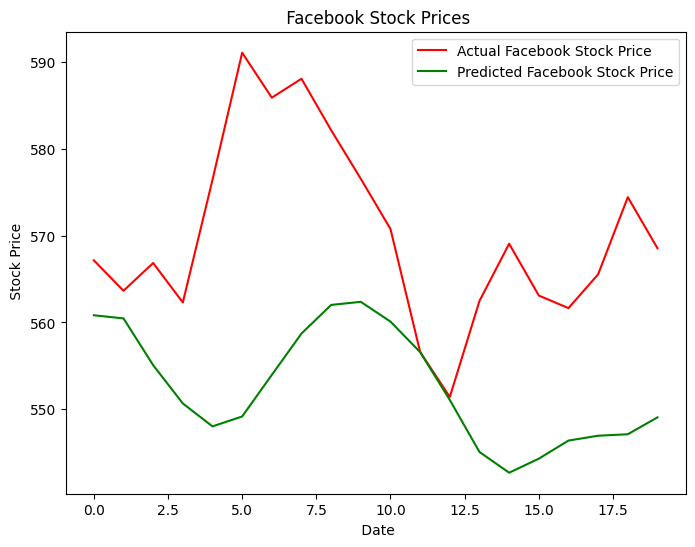

In [25]:
#plotting original and predicted stock values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red' , label='Actual Facebook Stock Price')
plt.plot(y_pred, color='green', label='Predicted Facebook Stock Price')
plt.title(' Facebook Stock Prices' )
plt.xlabel(' Date' )
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [49]:
model.save('./Models/METAStockModel.keras')

In [50]:
from tensorflow.keras.models import load_model
mymodel = load_model('./Models/METAStockModel.keras')

/home/sapt/miniconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
